## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import itertools
from joblib import Parallel, delayed

In [2]:
data = pd.read_csv("Resources/charity_data.csv")

In [3]:
data = data.drop(columns=["EIN", "NAME"])

In [4]:
app_type_counts = data["APPLICATION_TYPE"].value_counts()
app_type_to_replace = app_type_counts[app_type_counts < 100].index

data["APPLICATION_TYPE"] = data["APPLICATION_TYPE"].replace(app_type_to_replace, "Other")

classification_counts = data["CLASSIFICATION"].value_counts()
classification_to_replace = classification_counts[classification_counts < 100].index

data["CLASSIFICATION"] = data["CLASSIFICATION"].replace(classification_to_replace, "Other")

In [5]:
data_encoded = pd.get_dummies(data, columns=["APPLICATION_TYPE", "CLASSIFICATION", "AFFILIATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"], drop_first=True)

In [6]:
X = data_encoded.drop("IS_SUCCESSFUL", axis=1).values
y = data_encoded["IS_SUCCESSFUL"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
number_input_features = X_train_scaled.shape[1]

In [10]:


def train_model(hidden_layer, neuron, optimizer):
    # Build the model
    model = Sequential()
    
    # Add input layer
    model.add(Dense(units=neuron, activation='relu', input_dim=number_input_features))

    # Add hidden layers
    for _ in range(hidden_layer - 1):
        model.add(Dense(units=neuron, activation='relu'))
    
    # Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    return {
        'hidden_layers': hidden_layer,
        'neurons_per_layer': neuron,
        'optimizer': optimizer,
        'loss': loss,
        'accuracy': accuracy
    }

# Define a list of possible configurations
hidden_layers = [1, 2, 3]
neurons_per_layer = [32, 64, 128]
optimizers = ['adam', 'sgd', 'rmsprop']
combinations = list(itertools.product(hidden_layers, neurons_per_layer, optimizers))

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['hidden_layers', 'neurons_per_layer', 'optimizer', 'loss', 'accuracy'])

# Train models in parallel
n_jobs = 2  # Set to the number of CPU cores or -1 to use all available cores
results = Parallel(n_jobs=n_jobs)(delayed(train_model)(hl, n, opt) for hl, n, opt in combinations)

# Save the results to the DataFrame
results_df = results_df.append(results, ignore_index=True)

# # Save the results to a CSV file
# results_df.to_csv('model_optimization_results.csv', index=False)

results_df


In [11]:

# # Define a list of possible configurations
# hidden_layers = [1, 2, 3]
# neurons_per_layer = [32, 64, 128]
# optimizers = ['adam', 'sgd', 'rmsprop']
# combinations = list(itertools.product(hidden_layers, neurons_per_layer, optimizers))

# # Create an empty DataFrame to store the results
# results_df = pd.DataFrame(columns=['hidden_layers', 'neurons_per_layer', 'optimizer', 'loss', 'accuracy'])

# # Loop through the possible configurations
# for hidden_layer, neuron, optimizer in combinations:
#     # Build the model
#     model = Sequential()
    
#     # Add input layer
#     model.add(Dense(units=neuron, activation='relu', input_dim=number_input_features))

#     # Add hidden layers
#     for _ in range(hidden_layer - 1):
#         model.add(Dense(units=neuron, activation='relu'))
    
#     # Add output layer
#     model.add(Dense(units=1, activation='sigmoid'))
    
#     # Compile the model
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
#     # Train the model
#     model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
    
#     # Evaluate the model
#     loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
#     # Save the results to the DataFrame
#     results_df = results_df.append({
#         'hidden_layers': hidden_layer,
#         'neurons_per_layer': neuron,
#         'optimizer': optimizer,
#         'loss': loss,
#         'accuracy': accuracy
#     }, ignore_index=True)

# # Save the results to a CSV file
# results_df.to_csv('model_optimization_results.csv', index=False)
# results_df

,hidden_layers,neurons_per_layer,optimizer,loss,accuracy
0,1,32,adam,0.554556,0.728863
1,1,32,sgd,0.556007,0.727843
2,1,32,rmsprop,0.563345,0.725219
3,1,64,adam,0.557172,0.726093
4,1,64,sgd,0.556179,0.726531
5,1,64,rmsprop,0.563969,0.725656
6,1,128,adam,0.555666,0.726239
7,1,128,sgd,0.554104,0.728717
8,1,128,rmsprop,0.581195,0.724636
9,2,32,adam,0.558398,0.722157


In [12]:
# Play a sound to let you know its done 
import winsound
duration = 2000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

c:\Users\jonow\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


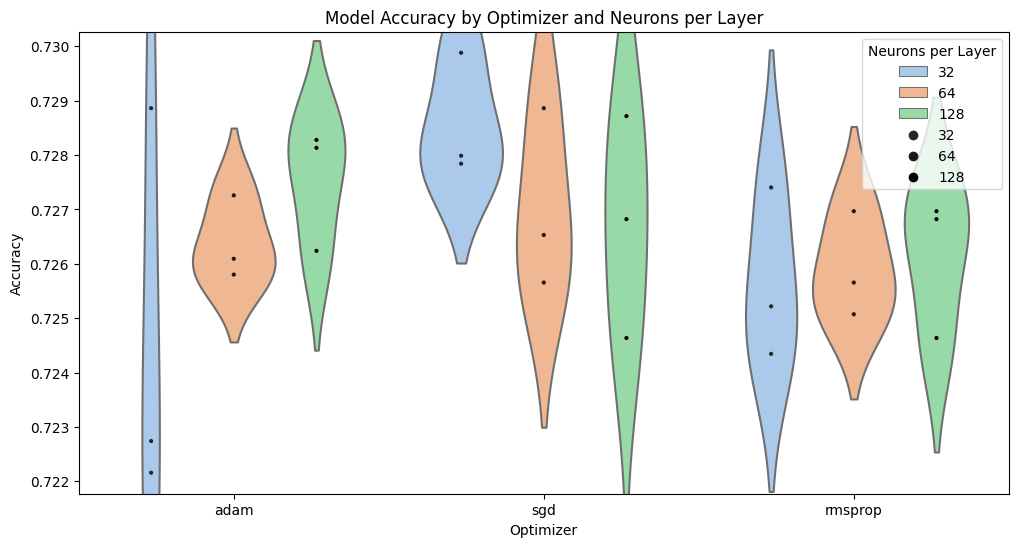

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a violin plot
sns.violinplot(ax=ax, data=results_df, x='optimizer', y='accuracy', hue='neurons_per_layer', inner=None, palette='pastel')

# Create a swarm plot
sns.swarmplot(ax=ax, data=results_df, x='optimizer', y='accuracy', hue='neurons_per_layer', color='black', size=3, dodge=True)

# Customize the plot
ax.set_title('Model Accuracy by Optimizer and Neurons per Layer')
ax.set_xlabel('Optimizer')
ax.set_ylabel('Accuracy')
ax.legend(title='Neurons per Layer')

# Show the plot
plt.show()


This combined plot allows you to see both the distribution of accuracy and the individual data points for each optimizer and neurons per layer configuration.

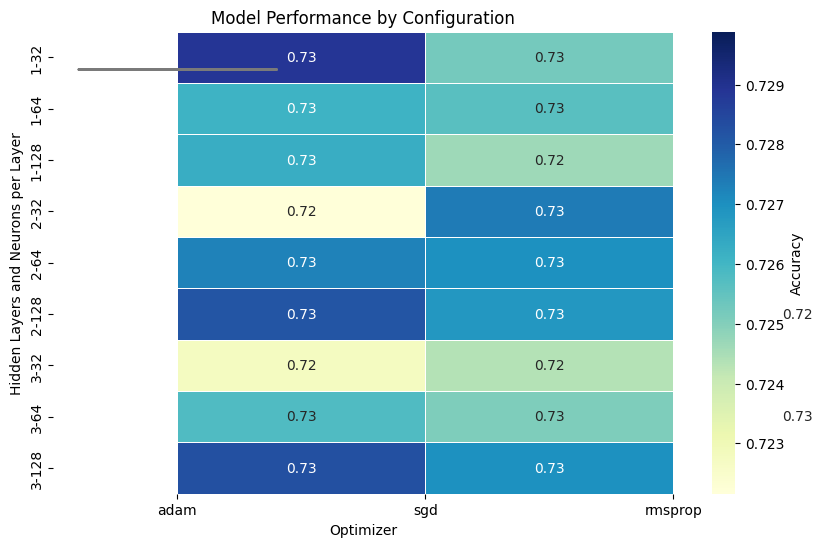

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table from the results_df DataFrame
pivot_table = results_df.pivot_table(values='accuracy', index=['hidden_layers', 'neurons_per_layer'], columns='optimizer')

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", linewidths=.5, cmap='YlGnBu', cbar_kws={'label': 'Accuracy'}, ax=ax)

# Create the violin plots
for i, optimizer in enumerate(results_df['optimizer'].unique()):
    temp_df = results_df[results_df['optimizer'] == optimizer]
    violin_data = temp_df['accuracy']
    sns.violinplot(y=violin_data, x=[i]*len(violin_data), ax=ax, inner='stick', palette='pastel')

# Set plot labels and title
ax.set_title('Model Performance by Configuration')
ax.set_xlabel('Optimizer')
ax.set_ylabel('Hidden Layers and Neurons per Layer')

# Customize x-axis ticks and labels
ax.set_xticks(range(len(results_df['optimizer'].unique())))
ax.set_xticklabels(results_df['optimizer'].unique())

plt.show()


In [15]:
# Identify the best model
best_model_index = results_df['accuracy'].idxmax()
best_model_params = results_df.loc[best_model_index]

In [25]:
# Extract the best model parameters
best_hidden_layers = int(best_model_params['hidden_layers'])
best_neurons_per_layer = int(best_model_params['neurons_per_layer'])
best_optimizer = best_model_params['optimizer']
best_loss = 0.552767932
best_accuracy = 0.729883373

print("Best Model Parameters:")
print(f"Hidden Layers: {best_hidden_layers}")
print(f"Neurons per Layer: {best_neurons_per_layer}")
print(f"Optimizer: {best_optimizer}")
print("\nBest Model Performance:")
print(f"Loss: {best_loss}")
print(f"Accuracy: {best_accuracy}")


Best Model Parameters:
Hidden Layers: 3
Neurons per Layer: 32
Optimizer: sgd

Best Model Performance:
Loss: 0.552767932
Accuracy: 0.729883373


In [17]:
# Rebuild the best model
best_model = Sequential()

In [18]:
# Add input layer
best_model.add(Dense(units=best_neurons_per_layer, activation='relu', input_dim=number_input_features))

# Add hidden layers
for _ in range(best_hidden_layers - 1):
    best_model.add(Dense(units=best_neurons_per_layer, activation='relu'))

# Add output layer
best_model.add(Dense(units=1, activation='sigmoid'))

In [19]:
# Compile the best model
best_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Train the best model
best_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

In [21]:
# Save the best model to an HDF5 file
best_model.save('AlphabetSoupCharity_Optimisation.h5')